# Algoritmo

$p_{i}=\frac{k_{i}}{\sum_{j}k_{j}}$

In [1]:
import networkx as nx
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def distribucion_p(h):
    """
    Devuelve un pool de IDs de nodos
    con ocurrencias proporcionales a la probabilidad de conexion
    del modelo Barabasi-Albert
    """
    pool = []
    for n in h.nodes:
        deg = h.degree[n]
        pool += [n,] * deg   # esta multiplicción crea una lista 
                             # con *deg* numero de elementos *n*
    return pool

def agrega_nodos(h, i, m):
    # nodo nuevo
    h.add_node(i)
    
    # se eligen m nodos
    targets = random.sample(distribucion_p(h),
                            m)
    # se conectan
    for t in targets:
        h.add_edge(i, t)

In [3]:
def plot_12_nw(nets, layout=nx.spring_layout, node_color='firebrick'):
    plt.figure(1, dpi=160)
    for i in range(12):
        g = nets[i]
        pos = layout(g)
        ax = plt.subplot(3, 4, i+1)
        ax.set_axis_off()
        ax.set_title("$t=%s$" % i, fontsize=6, y=0.92)
        plt.xticks([]), plt.yticks([])
        nodos = sorted(list(g.nodes()))
        deg = [v[1]*10 for v in g.degree(nodos)]        
        nx.draw_networkx_nodes(g, pos,
                               nodelist=nodos,
                               node_color=node_color,
                               node_size=deg,
                               alpha=1)
        nx.draw_networkx_edges(g, pos, width=1.0, alpha=0.5)

# Condiciones Iniciales: $m_{0}=2, m=1$

In [4]:
g = nx.Graph()
g.add_node(0)
g.add_node(1)
g.add_edge(0, 1)

In [5]:
pools_t = []  # para guardar el pool de donde se eligen nodos para conectarlos a los nuevos
nets_t = []   # para guardar copias de la red en cada t
for i in range(2, 14):
    pools_t.append(distribucion_p(g))
    nets_t.append(g.copy())
    agrega_nodos(g, i, 1)

## Probabilidades al agregar nodos

En la siguiente tabla cada renglón muestra la lista de entre la que se eligió $m$ nodos para conectarlos a cada nodo nuevo. Los números representan los nodos, se repiten en proporción a su grado de conectividad, lo que hace que la probabilidad de elegirlos sea precisamente $p_{i}=\frac{k_{i}}{\sum_{j}k_{j}}$, o sea una proporción entre el grado del i-ésimo nodo y todos los grados de los demás nodos.

In [6]:
pools_t

[[0, 1],
 [0, 1, 1, 2],
 [0, 1, 1, 2, 2, 3],
 [0, 1, 1, 2, 2, 2, 3, 4],
 [0, 1, 1, 2, 2, 2, 3, 3, 4, 5],
 [0, 1, 1, 2, 2, 2, 3, 3, 4, 5, 5, 6],
 [0, 1, 1, 2, 2, 2, 2, 3, 3, 4, 5, 5, 6, 7],
 [0, 1, 1, 1, 2, 2, 2, 2, 3, 3, 4, 5, 5, 6, 7, 8],
 [0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 4, 5, 5, 6, 7, 8, 9],
 [0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 4, 5, 5, 6, 7, 8, 9, 10],
 [0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 4, 5, 5, 6, 7, 8, 9, 10, 11],
 [0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 4, 4, 5, 5, 6, 7, 8, 9, 10, 11, 12]]

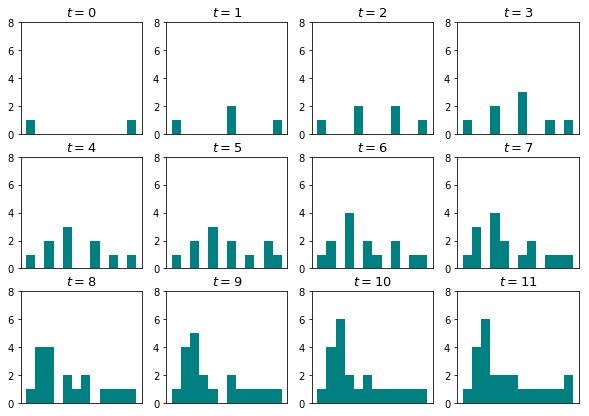

In [7]:
plt.figure(figsize=(10, 7))
for i in range(12):
    ax = plt.subplot(3, 4, i+1)
    ax.set_title("$t=%s$" % i, fontsize=13)
    plt.ylim([0, 8])
    plt.xticks([])
    plt.hist(pools_t[i], bins=12, color='teal')

## Surgimiento de *hubs*

Se puede ver cómo van sugiendo *hubs* con cada nodo que se agrega. 

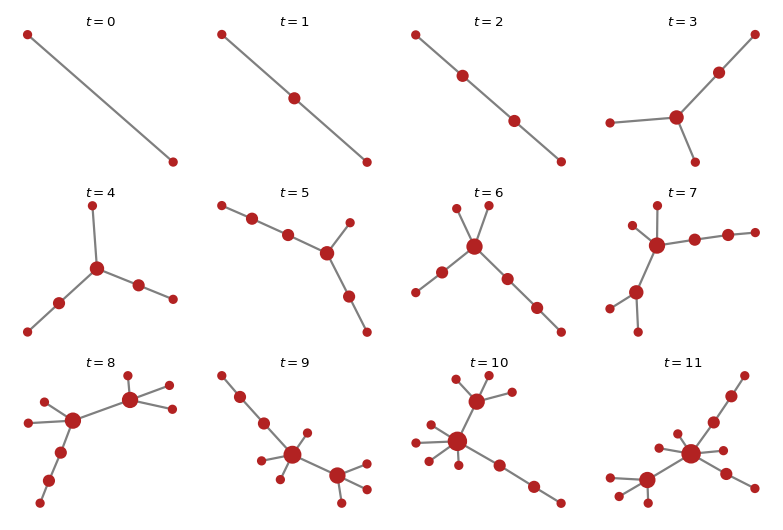

In [8]:
plot_12_nw(nets_t)

# Condiciones Iniciales: $m_{0}=m=2$

In [9]:
g = nx.Graph()
g.add_node(0)
g.add_node(1)
g.add_edge(0, 1)

In [10]:
pools_t = []
nets_t = []
for i in range(2, 14):
    pools_t.append(distribucion_p(g))
    nets_t.append(g.copy())
    agrega_nodos(g, i, 2)

## Distribución poquito más homogenea de $p_{i}$

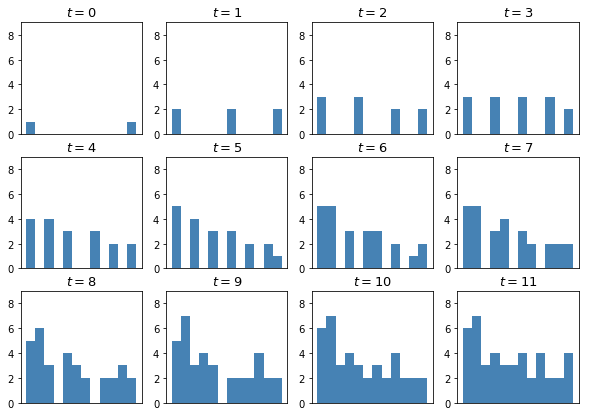

In [11]:
plt.figure(figsize=(10, 7))
for i in range(12):
    ax = plt.subplot(3, 4, i+1)
    ax.set_title("$t=%s$" % i, fontsize=13)
    plt.ylim([0, 9])
    plt.xticks([])
    plt.hist(pools_t[i], bins=12, color='steelblue')

## Más triángulos, más *clustering* 

Conforme crece la red los dos nodos a los que cada nuevo se conectará serán los mismos, creando siempre triángulos.

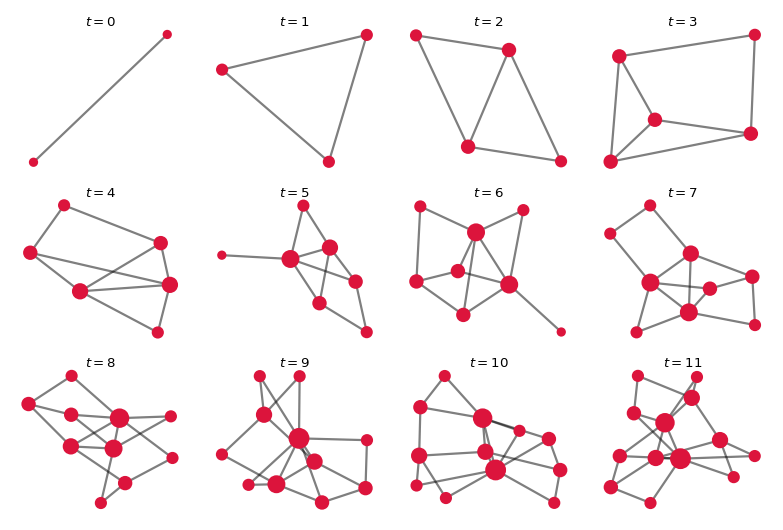

In [12]:
plot_12_nw(nets_t, node_color='crimson')